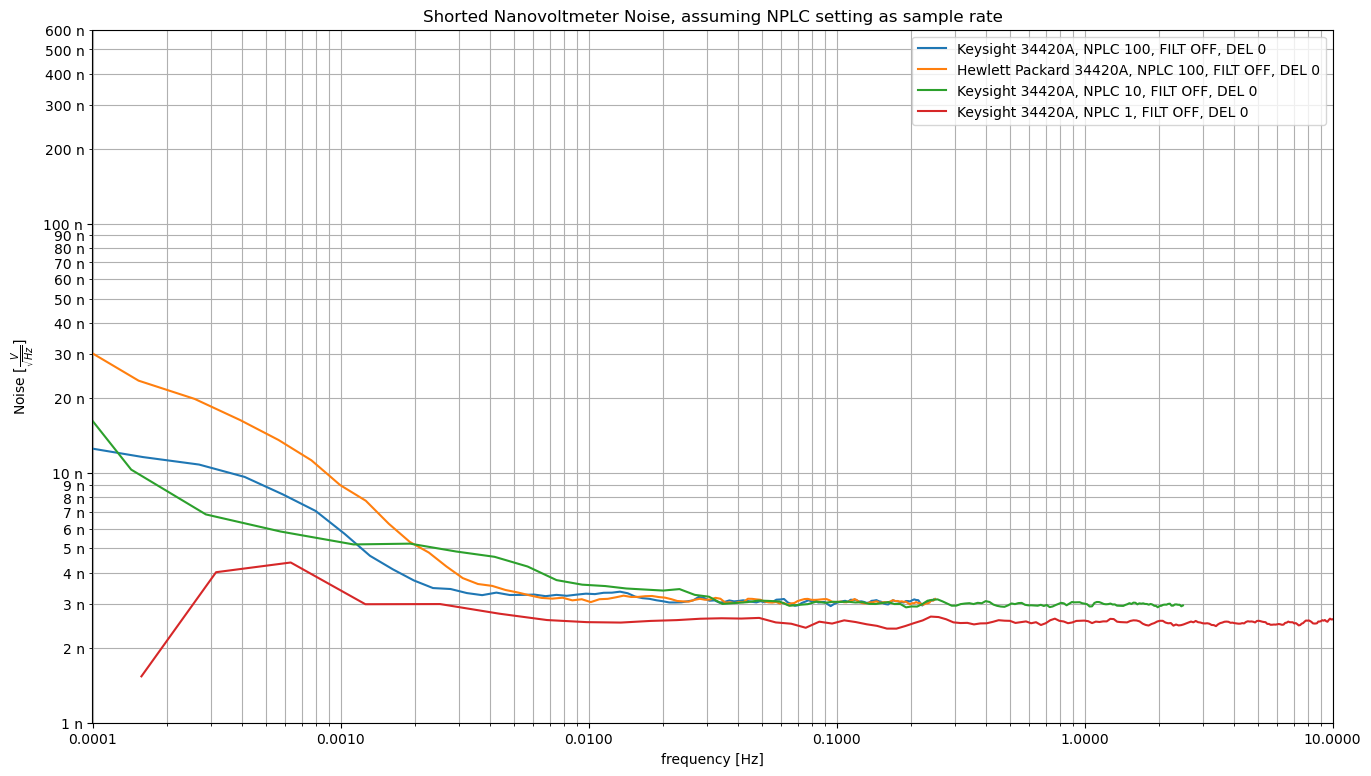

In [17]:
import pandas as pd
from lpsd import lpsd, flattop # https://gitlab.com/uhh-gwd/lpsd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
import numpy as np

# Set up plot
fig,ax = plt.subplots(figsize=(16,9))
plt.loglog()
plt.xlim([0.0001,10])
plt.ylim([0.000000001,0.0000006])
plt.xlabel('frequency [Hz]')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())
plt.ylabel(r'Noise [$\frac{V}{\sqrt{Hz}}$]')
plt.grid(True, which="both")
plt.title('Shorted Nanovoltmeter Noise, assuming NPLC setting as sample rate')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240320-070507_Keysight_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20240319-164251_HP_34420A_short_NPLC100.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=0.5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Hewlett Packard 34420A, NPLC 100, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20241109-204412_Keysight_34420A_short_NPLC10.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=5, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 10, FILT OFF, DEL 0')

# Array from .csv
df = pd.read_csv('https://raw.githubusercontent.com/marcoreps/34420a/refs/heads/main/20241128-225634_Keysight_34420A_short_NPLC1.csv')
spectrum = lpsd(df['34420a_volt'], sample_rate=50, n_frequencies=100000, n_averages=300000, window_function=flattop.HFT90D, overlap = flattop.olap_dict["HFT90D"], detrending_order=1)
plt.plot(spectrum.index, spectrum["asd"], label='Keysight 34420A, NPLC 1, FILT OFF, DEL 0')

plt.legend()